<a href="https://colab.research.google.com/github/yuniastariiy/IBM-Data-Analyst---Phyton/blob/main/Practice_Project_DA_with_Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice Project: Insurance Cost Analysis**

This report presents a comprehensive analysis of an insurance cost dataset consisting of several demographic and lifestyle variables. The goal is to develop predictive models for annual insurance charges using various regression techniques and to identify the factors that significantly influence these charges.

## 📄 Dataset Parameters

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

### Importing Required Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset

In [37]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv -O insurance.csv


df = pd.read_csv("insurance.csv")
df.head()

--2025-06-08 09:41:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78536 (77K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  76.70K  --.-KB/s    in 0.02s   

2025-06-08 09:41:14 (3.49 MB/s) - ‘insurance.csv’ saved [78536/78536]



,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


### Task 1 : Import the dataset

In [38]:
# Load CSV without headers
df = pd.read_csv("insurance.csv", header=None)

# Assign column names as per the dataset description
df.columns = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']

# Print first 10 rows to check
print(df.head(10))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520
5  31       1  25.740               0      ?       4   3756.62160
6  46       1  33.440               1      0       4   8240.58960
7  37       1  27.740               3      0       1   7281.50560
8  37       2  29.830               2      0       2   6406.41070
9  60       1  25.840               0      0       1  28923.13692


In [39]:
# Replace all '?' strings in the dataframe with np.nan
df.replace('?', np.nan, inplace=True)

# Print first 10 rows to check
print(df.head(10))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520
5  31       1  25.740               0    NaN       4   3756.62160
6  46       1  33.440               1      0       4   8240.58960
7  37       1  27.740               3      0       1   7281.50560
8  37       2  29.830               2      0       2   6406.41070
9  60       1  25.840               0      0       1  28923.13692


### Task 2 : Data Wrangling

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


The dataset contains 2,772 entries and 7 columns. Based on the .info() output:

*   The age column has 4 missing values and is stored as an object type, which is
unusual for a numeric field. It should be converted to an integer or float after handling missing values.
*   The gender, bmi, no_of_children, region, and charges columns are complete with no missing values and are in appropriate numeric formats.
*   The smoker column has 7 missing entries and is stored as an object, which likely indicates categorical data (e.g., "yes" or "no").












In [41]:
# Convert 'age' to numeric, coercing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Fill missing values in 'age' with the mean
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

# Fill missing values in 'smoker' with the mode (most frequent value)
smoker_mode = df['smoker'].mode()[0]
df['smoker'] = df['smoker'].fillna(smoker_mode)

# Convert 'age' to integer type
df['age'] = df['age'].astype(int)

# Check dataframe info to verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 151.7+ KB


The dataset is now clean and correctly typed, and ready for further analysis or modeling.

In [42]:
# Round the 'charges' column to 2 decimal places
df['charges'] = df['charges'].round(2)

# Print the first 5 rows to verify
print(df.head())

   age  gender     bmi  no_of_children smoker  region   charges
0   19       1  27.900               0      1       3  16884.92
1   18       2  33.770               1      0       4   1725.55
2   28       2  33.000               3      0       4   4449.46
3   33       2  22.705               0      0       1  21984.47
4   32       2  28.880               0      0       1   3866.86


The charges column has been rounded to 2 decimal places for consistency and readability.

### Task 3 : Exploratory Data Analysis (EDA)


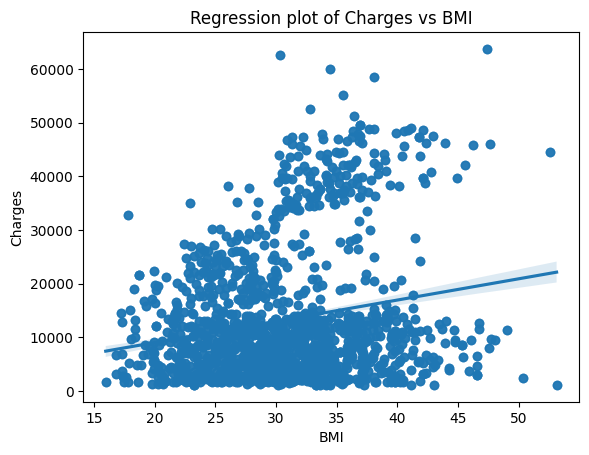

In [43]:
# Create regression plot for charges vs bmi
sns.regplot(x='bmi', y='charges', data=df)

# Add title and labels for clarity
plt.title('Regression plot of Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Show the plot
plt.show()

### Interpretation of the Scatter Plot (BMI vs Medical Charges)

- **Positive Relationship:** There appears to be a weak to moderate positive linear relationship between BMI and Charges. As BMI increases, medical charges tend to increase, as indicated by the upward sloping regression line.

- **Spread of Data (Heteroscedasticity):** The data points are quite scattered, especially at higher BMI values. This suggests that while there's a general trend, BMI alone doesn't explain a large portion of the variance in charges. The spread also seems to increase with higher BMI, which could indicate heteroscedasticity (the variance of the residuals is not constant across all levels of the independent variable).

- **Outliers:** There are several data points that lie significantly far from the main cluster and the regression line, particularly at higher charges and various BMI levels. These could be considered outliers and might warrant further investigation to understand their impact on the overall relationship.

- **Strength of Relationship:** The shaded area around the regression line represents the confidence interval. The relatively wide confidence interval, along with the scattered data, suggests that the predictive power of BMI on charges is not extremely strong. While there's a trend, individual charges vary considerably at similar BMI levels.

- **Practical Implication:** This plot suggests that higher BMI is associated with higher medical charges, which aligns with the understanding that higher BMI can lead to various health issues requiring medical attention. However, it also highlights that other factors not included in this plot likely play a significant role in determining medical charges.


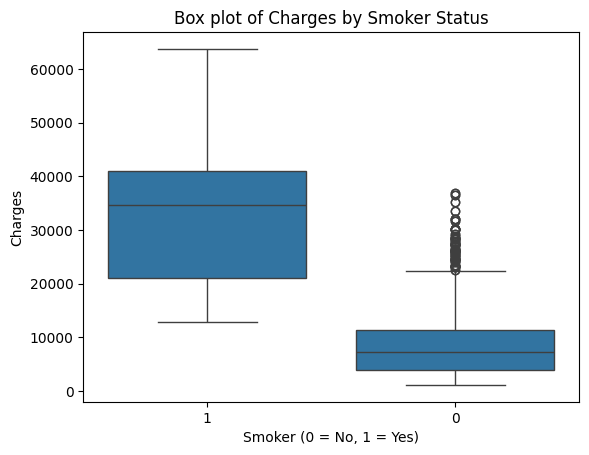

In [44]:
# Box plot for charges by smoker status
sns.boxplot(x='smoker', y='charges', data=df)

# Add title and axis labels
plt.title('Box plot of Charges by Smoker Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Charges')

# Show the plot
plt.show()

- Smokers have significantly higher medical charges than non-smokers.
- The median charges for smokers are much higher, and their charges show more variability.
- Some non-smokers also have high charges, but generally, smoking is a strong indicator of increased medical costs.


In [45]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


*  Strongest positive correlation with charges:

  Smoker (0.79) → Being a smoker is highly associated with higher insurance charges.
*   Moderate correlation:
  
  Age (0.30) → Older individuals tend to have higher charges.
  
  BMI (0.20) → Higher BMI is slightly linked to higher charges.
*   Weak or negligible correlations:
  
  Gender, number of children, and region show very low correlation with charges (all near 0.05–0.07), indicating minimal influence.

The smoker variable is the most influential feature for predicting insurance charges.







### Task 4 : Model Development

In [46]:
# Prepare feature (X) and target (y)
X = df[['smoker']]  # Use smoker attribute as feature, keep it as a DataFrame
y = df['charges']   # Target variable

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Predict charges using the model
y_pred = lr.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)
print(f'R² score using smoker attribute: {r2:.4f}')

R² score using smoker attribute: 0.6222


A simple linear regression model using only the smoker attribute as a predictor yields an R² score of 0.6222.
This means that approximately 62.22% of the variance in insurance charges can be explained solely by whether the individual is a smoker or not.

In [47]:
# Define features X (all columns except 'charges')
X = df.drop(columns=['charges'])

# Target variable y
y = df['charges']

# Initialize and fit the linear regression model
lr_all = LinearRegression()
lr_all.fit(X, y)

# Predict charges using the model
y_pred_all = lr_all.predict(X)

# Calculate R² score
r2_all = r2_score(y, y_pred_all)
print(f'R²  score using all attributes: {r2_all:.4f}')

R²  score using all attributes: 0.7504


The linear regression model using all attributes as predictors achieved an R² score of 0.7504.
This means that approximately 75.04% of the variance in insurance charges can be explained by the combined factors such as age, gender, BMI, number of children, smoking status, and region.
This indicates that including all features significantly improves the model’s performance compared to using only the smoker attribute.

In [48]:
# Define features and target
X = df.drop(columns=['charges'])
y = df['charges']

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: scale features
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),  # Step 2: add polynomial features
    ('linear_regression', LinearRegression())   # Step 3: linear regression
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Print the R² score on the training data
print("R² score with polynomial features:", pipeline.score(X, y))

R² score with polynomial features: 0.8452576213500093


The regression model using polynomial features of degree 2, combined with feature scaling, achieved an R² score of approximately 0.8453 on the training data. This means the model can explain about 84.53% of the variance in insurance charges, showing a significant improvement over the linear model without polynomial features. Adding polynomial terms helps the model capture more complex relationships between the features and the target variable

### Task 5 : Model Refinement

In [49]:
# Define the features (X) and target (y)
X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df["charges"]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2217, 6) (2217,)
Testing set shape: (555, 6) (555,)


In [50]:
# Initialize Ridge regressor with alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fit model to training data
ridge_model.fit(X_train, y_train)

# Evaluate R^2 score on testing data
r2_ridge = ridge_model.score(X_test, y_test)
print("R² score on testing data:", round(r2_ridge, 4))

R² score on testing data: 0.7395


A Ridge regression model was trained on the training dataset with a regularization parameter (alpha) of 1.0. When evaluated on the testing set, the model achieved an R² score of approximately 0.7395, indicating that about 73.95% of the variance in insurance charges can be explained by the model.

In [51]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training and testing features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the Ridge model on the transformed features
ridge_poly_model = Ridge(alpha=1.0)
ridge_poly_model.fit(X_train_poly, y_train)

# Evaluate the model
r2_poly_ridge = ridge_poly_model.score(X_test_poly, y_test)
print("R² score on testing data after polynomial transformation:", round(r2_poly_ridge, 4))

R² score on testing data after polynomial transformation: 0.8338


After applying polynomial feature transformation of degree 2 to the training and testing data, a Ridge regression model was trained and evaluated. The model achieved an improved R² score of approximately 0.8338 on the test set, indicating that around 83.38% of the variance in insurance charges is explained by the model. This suggests that including polynomial features helps capture more complex relationships in the data

### Summary and Recommendation

**Summary:**

- Smoking status is the strongest factor affecting medical charges. Smokers have significantly higher median charges and greater variability compared to non-smokers.
- BMI shows a moderate positive correlation with charges; higher BMI tends to increase costs but with more variability.
- Other factors like age, gender, number of children, and region have smaller impacts.
- Using polynomial features with Ridge regression improved the model, indicating some non-linear relationships.

**Practical Implications:**

- Smoking cessation programs could significantly reduce medical costs.
- Weight management initiatives may help control insurance expenses.
- Further data collection and advanced modeling could improve predictions and management of high-cost cases.

**Recommendations:**

- Focus on smoking-related interventions as a priority.
- Implement lifestyle programs to reduce BMI.
- Collect additional health and behavioral data for improved analysis.
- Explore advanced machine learning techniques for better accuracy.
